# Features importance

The methode Feature importance displays bar chart represent the<br />
sum of absolute contribution values of each feature.

this method also makes it possible to represent this sum calculated <br />
on a subset and to compare it with the total population

<b>This short tutorial </b>presents the different parameters you can use.

Contents:
- Classification case: Specify the target modality to display.
- selection parameter to display a subset
- max_features parameter limits the number of features 

Data from Kaggle [Titanic](https://www.kaggle.com/c/titanic/data)

In [1]:
import pandas as pd
from category_encoders import OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

## Building Supervized Model 

Load Titanic data

In [2]:
from shapash.data.data_loader import data_loading
titanic_df, titanic_dict = data_loading('titanic')
del titanic_df['Name']
y_df=titanic_df['Survived'].to_frame()
X_df=titanic_df[titanic_df.columns.difference(['Survived'])]

In [3]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,Third class,male,22.0,1,0,7.25,Southampton,Mr
2,1,First class,female,38.0,1,0,71.28,Cherbourg,Mrs
3,1,Third class,female,26.0,0,0,7.92,Southampton,Miss
4,1,First class,female,35.0,1,0,53.10,Southampton,Mrs
5,0,Third class,male,35.0,0,0,8.05,Southampton,Mr


Load Titanic data

In [4]:
from category_encoders import OrdinalEncoder

categorical_features = [col for col in X_df.columns if X_df[col].dtype == 'object']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True).fit(X_df)

X_df=encoder.transform(X_df)

Train / Test Split + model fitting

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, train_size=0.75, random_state=7)

In [6]:
clf = ExtraTreesClassifier(n_estimators=200).fit(Xtrain,ytrain)

#### First step: You need to Declare and Compile SmartExplainer 

In [7]:
from shapash.explainer.smart_explainer import SmartExplainer

In [8]:
response_dict = {0: 'Death', 1:' Survival'}

In [9]:
xpl = SmartExplainer(features_dict=titanic_dict, # Optional parameters
                     label_dict=response_dict) # Optional parameters, dicts specify labels 

In [10]:
xpl.compile(
    x=Xtest,
    model=clf,
    preprocessing=encoder, # Optional: compile step can use inverse_transform method
)

Backend: Shap TreeExplainer


## Display Feature Importance


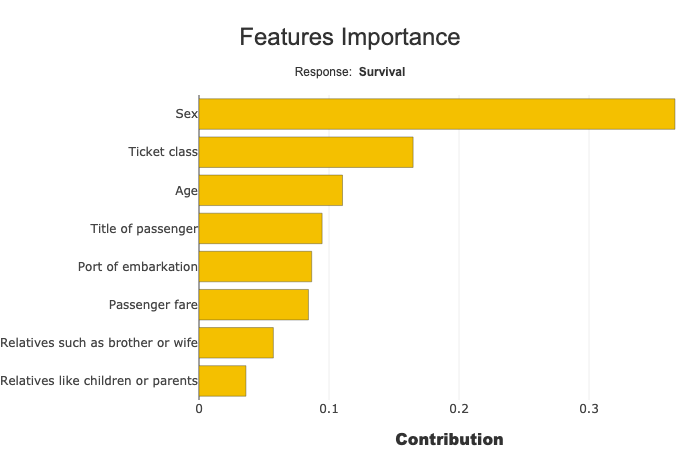

In [11]:
xpl.plot.features_importance()

## Multiclass: Select the target modality

Features importances sum and display the absolute contribution for one target modality.<br />
you can change this modality, selectig with label parameter: <br />

<b>xpl.plot.features_importance(label='Death')</b><br />

with label parameter you can specify target value, label or number 

## Focus and compare a subset

selection parameter specify the subset:

In [12]:
sel = [581, 610, 524, 636, 298, 420, 568, 817, 363, 557,
       486, 252, 390, 505, 16, 290, 611, 148, 438, 23, 810,
       875, 206, 836, 143, 843, 436, 701, 681, 67, 10]

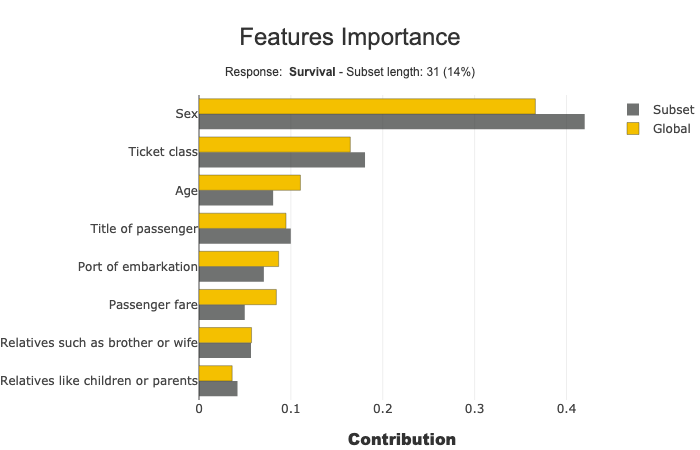

In [13]:
xpl.plot.features_importance(selection=sel)

## Tune the number of features to display

Use max_features parameter (default value: 20)

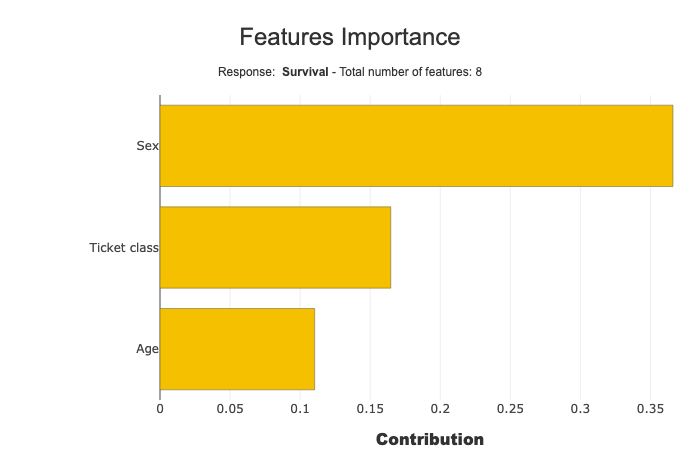

In [15]:
xpl.plot.features_importance(max_features=3)